## Regresion Polinómica

En este modelo se trabaja con solo UNA variable

#### Carga de librerias y datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv(r'C:\Users\carolina\Desktop\FormDataAnalyst\Modelos\regresion-polinomica.csv')

In [4]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [27]:
df['Position'].value_counts() # es categorica

Business Analyst     1
Junior Consultant    1
Senior Consultant    1
Manager              1
Country Manager      1
Region Manager       1
Partner              1
Senior Partner       1
C-level              1
CEO                  1
Name: Position, dtype: int64

* Trabajaremos con Level (es la var cuantitativa) como variable predictora y Salary como variable objetivo.

In [7]:
df[['Level','Salary']].corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


<AxesSubplot:xlabel='Level', ylabel='Salary'>

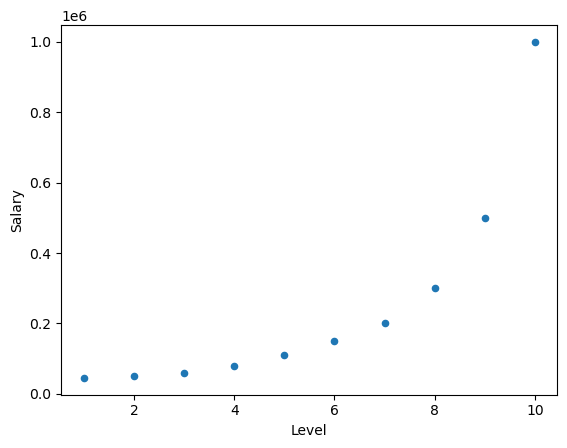

In [10]:
df[['Level','Salary']].plot.scatter(x='Level',y='Salary')

Esto tiene forma curva. Ya se ve que una linea recta no va a aproximar bien.

In [12]:
df.head(3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


In [17]:
df['Level'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

##### Division variables independiente y dependiente

In [32]:
x=df.iloc[:,[1]].values # [[]] para que sea un array de arrays o sea matriz y luego no tenga que hacer el reshape en los modelos
y=df.iloc[:,[2]].values

In [33]:
y # salario

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [34]:
x # level o años de experiencia

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

##### Transformacion

* Missing (no hay)

In [37]:
#df['Level'].isnull().value_counts
df.isnull().any()

Position    False
Level       False
Salary      False
dtype: bool

* Dummy no hay. Solo trabajaremos con la variable cuantitativa ordinal

#### Division training y test

Solo hay 10 registros. Usamos todos los datos sin dividir.

#### Normalizacion/Estandarizacion

No aplica porque estamos en Regresion Lineal. La normalizacion es necesaria en otros modelos, NO en regresion lineal.

#### Seleccion de variables

No aplica. Solo tenemos una variable.

#### Creacion del modelo (Regresion Polinomica)

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [40]:
# Polinomio grado 2
mc_gr2=PolynomialFeatures(degree=2) #  (matriz de caracteristicas para un polinomio de grado 2, ajuste cuadratico)
x_poly2=mc_gr2.fit_transform(x) # coeficientes al cuadrado
reg_gr2=LinearRegression()
reg_gr2.fit(x_poly2,y)

LinearRegression()

In [41]:
# Polinomio grado 3
mc_gr3=PolynomialFeatures(degree=3) #  (matriz de caracteristicas para un polinomio de grado 2, ajuste cuadratico)
x_poly3=mc_gr3.fit_transform(x) # coheficientes al cuadrado
reg_gr3=LinearRegression()
reg_gr3.fit(x_poly3,y)

LinearRegression()

In [42]:
# Polinomio grado 4
mc_gr4=PolynomialFeatures(degree=4) #  (matriz de caracteristicas para un polinomio de grado 2, ajuste cuadratico)
x_poly4=mc_gr4.fit_transform(x) # coheficientes al cuadrado
reg_gr4=LinearRegression()
reg_gr4.fit(x_poly4,y)

LinearRegression()

#### Modelo de Regresion lineal Simple (Polinomica de grado 1)

In [23]:
regresion=LinearRegression()
regresion.fit(x,y) 

LinearRegression()

#### Prediccion para 6.5 level /años de experiencia

Una vez obtenidos los cuatro modelos, aplicamos para el valor de prediccion

In [45]:
# Lineal
y_pred_lineal=regresion.predict([[6.5]]) # Hay que aplicar la transformacion y pasarle el valor como matriz
y_pred_lineal

array([330378.78787879])

In [52]:
# Polinomica de grado 2
y_pred_gr2=reg_gr2.predict(mc_gr2.fit_transform([[6.5]]))
y_pred_gr2

array([[189498.10606061]])

In [51]:
# Polinomica de grado 3
y_pred_gr3=reg_gr3.predict(mc_gr3.fit_transform([[6.5]]))
y_pred_gr3

array([[133259.46969697]])

In [48]:
# Polinomica de grado 4
y_pred_gr4=reg_gr4.predict(mc_gr4.fit_transform([[6.5]]))
y_pred_gr4

array([[158862.45265153]])

#### Evaluacion de los modelos (R2, mae y mse)

In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  

In [50]:
r2_lineal=r2_score(y, regresion.predict(x)) 
mae_lineal=mean_absolute_error(y, regresion.predict(x))
mse_lineal=mean_squared_error(y, regresion.predict(x))
print(f'Estadisticos de la regresion lineal\n r2: {r2_lineal:.2f} \n mae: {mae_lineal:.2f} \n mse: {mse_lineal:.2f}')

Estadisticos de la regresion lineal
 r2: 0.67 
 mae: 128454.55 
 mse: 26695878787.88


In [58]:
r2_gr2=r2_score(y, reg_gr2.predict(mc_gr2.fit_transform(x))) 
mae_gr2=mean_absolute_error(y, reg_gr2.predict(mc_gr2.fit_transform(x)))
mse_gr2=mean_squared_error(y, reg_gr2.predict(mc_gr2.fit_transform(x)))
print(f'Estadisticos de la regresion polinomica de Gr2:\n r2: {r2_gr2:.2f} \n mae: {mae_gr2:.2f} \n mse: {mse_gr2:.2f}')

Estadisticos de la regresion polinomica de Gr2:
 r2: 0.92 
 mae: 70218.18 
 mse: 6758833333.33


In [56]:
r2_gr3=r2_score(y, reg_gr3.predict(mc_gr3.fit_transform(x))) 
mae_gr3=mean_absolute_error(y, reg_gr3.predict(mc_gr3.fit_transform(x)))
mse_gr3=mean_squared_error(y, reg_gr3.predict(mc_gr3.fit_transform(x)))
print(f'Estadisticos de la regresion polinomica de Gr3:\n r2: {r2_gr3:.2f} \n mae: {mae_gr3:.2f} \n mse: {mse_gr3:.2f}')

Estadisticos de la regresion polinomica de Gr3:
 r2: 0.98 
 mae: 34790.21 
 mse: 1515662004.66


In [57]:
r2_gr4=r2_score(y, reg_gr4.predict(mc_gr4.fit_transform(x))) 
mae_gr4=mean_absolute_error(y, reg_gr4.predict(mc_gr4.fit_transform(x)))
mse_gr4=mean_squared_error(y, reg_gr4.predict(mc_gr4.fit_transform(x)))
print(f'Estadisticos de la regresion polinomica de Gr4:\n r2: {r2_gr4:.2f} \n mae: {mae_gr4:.2f} \n mse: {mse_gr4:.2f}')

Estadisticos de la regresion polinomica de Gr4:
 r2: 1.00 
 mae: 12681.82 
 mse: 210343822.84


#### Grafica

GRAFICA DE LA REGRESION LINEAL

<function matplotlib.pyplot.show(close=None, block=None)>

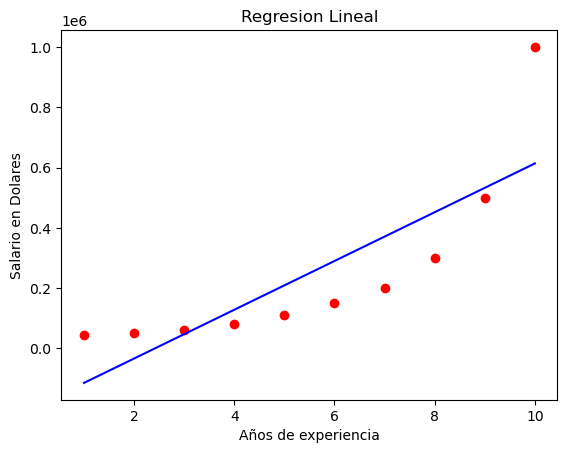

In [59]:
plt.title('Regresion Lineal')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario en Dolares')
plt.scatter(x, y, color='red')
plt.plot(x, regresion.predict(x), color='blue')
plt.show

* Como se observa, la recta no aproxima bien a esta grafica. Hay un valor muy alto que dista mucho de la recta.

GRAFICA DEL POLINOMIO DE GRADO 2

<function matplotlib.pyplot.show(close=None, block=None)>

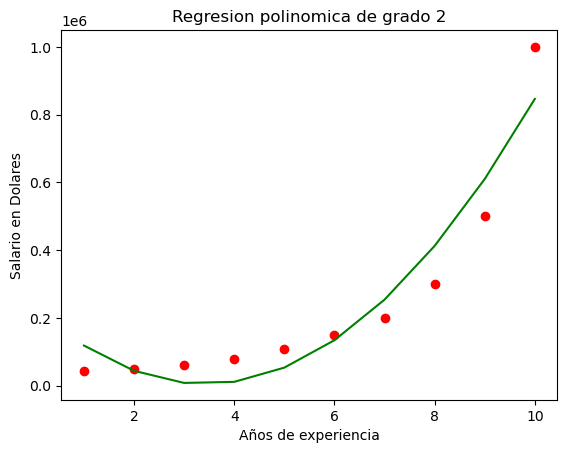

In [65]:
plt.title('Regresion polinomica de grado 2')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario en Dolares')
plt.scatter(x, y, color='red')
plt.plot(x, reg_gr2.predict(mc_gr2.fit_transform(x)), color='green')
plt.show

GRAFICA DEL POLINOMIO DE GRADO 3

<function matplotlib.pyplot.show(close=None, block=None)>

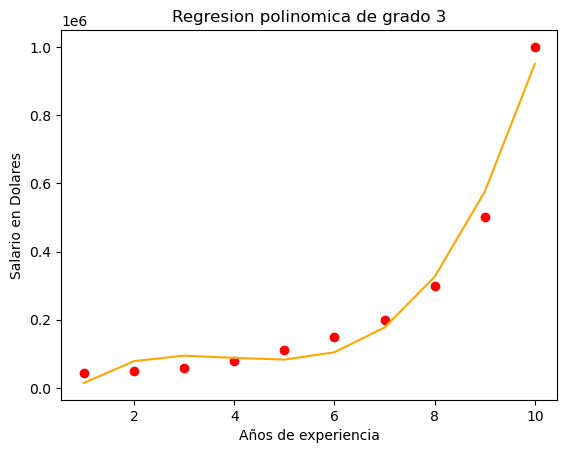

In [66]:
plt.title('Regresion polinomica de grado 3')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario en Dolares')
plt.scatter(x, y, color='red')
plt.plot(x, reg_gr3.predict(mc_gr3.fit_transform(x)), color='orange')
plt.show

GRAFICA DEL POLINOMIO DE GRADO 4

<function matplotlib.pyplot.show(close=None, block=None)>

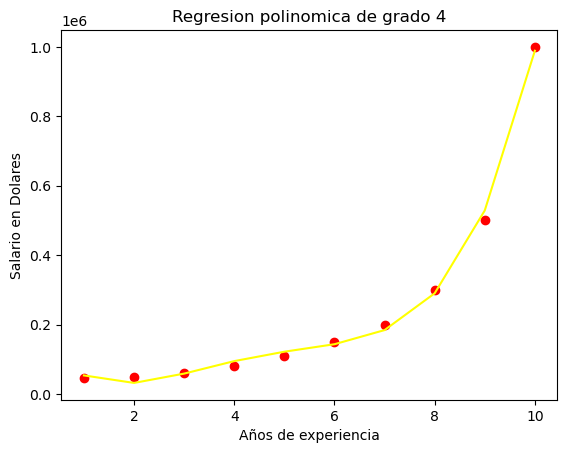

In [67]:
plt.title('Regresion polinomica de grado 4')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario en Dolares')
plt.scatter(x, y, color='red')
plt.plot(x, reg_gr4.predict(mc_gr4.fit_transform(x)), color='yellow')
plt.show